In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")
from zipfile import ZipFile

In [5]:
df=pd.read_csv("avocado.csv.zip")
df.index=df['Date']
df.drop('Date',axis=1,inplace=True)      #To avoid duplicacy of data
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [55]:
df.sample(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2016-06-26,26,1.07,367778.60,150191.51,90300.07,18403.06,108883.96,90996.76,17790.53,96.67,0,2016,44
2017-10-22,10,1.57,343882.42,130818.62,123575.63,17091.40,72396.77,68339.07,4057.70,0.00,0,2017,41
2015-07-19,23,1.63,3597.52,1209.37,23.85,34.07,2330.23,2330.23,0.00,0.00,1,2015,20


In [6]:
df.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
2018-01-14,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
2018-01-07,11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Here we can do two tasks:
    
    i) Regression for Average Price as its having continuous data
    
    ii) Classification for region as it is categorical

# Description

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
df.describe(include="O")

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


Here we can clearly see there are too much outliers present in the dataset and also there is skewness present.

In [8]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are clearly no null values present in the dataset.

In [9]:
#Checking duplicate values
df.duplicated().sum()

0

As we can see there are no duplicacy of data.

In [10]:
#Separating categorical column and numerical column
cat_col=[]
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
    elif df.dtypes[i]!='object':
        num_col.append(i)
    else:
        print("Error")
print("Cat_Col =",cat_col)
print("Num_Col =",num_col)

Cat_Col = ['type', 'region']
Num_Col = ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


In [11]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [12]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Visualization

# Uni-Variate Analysis

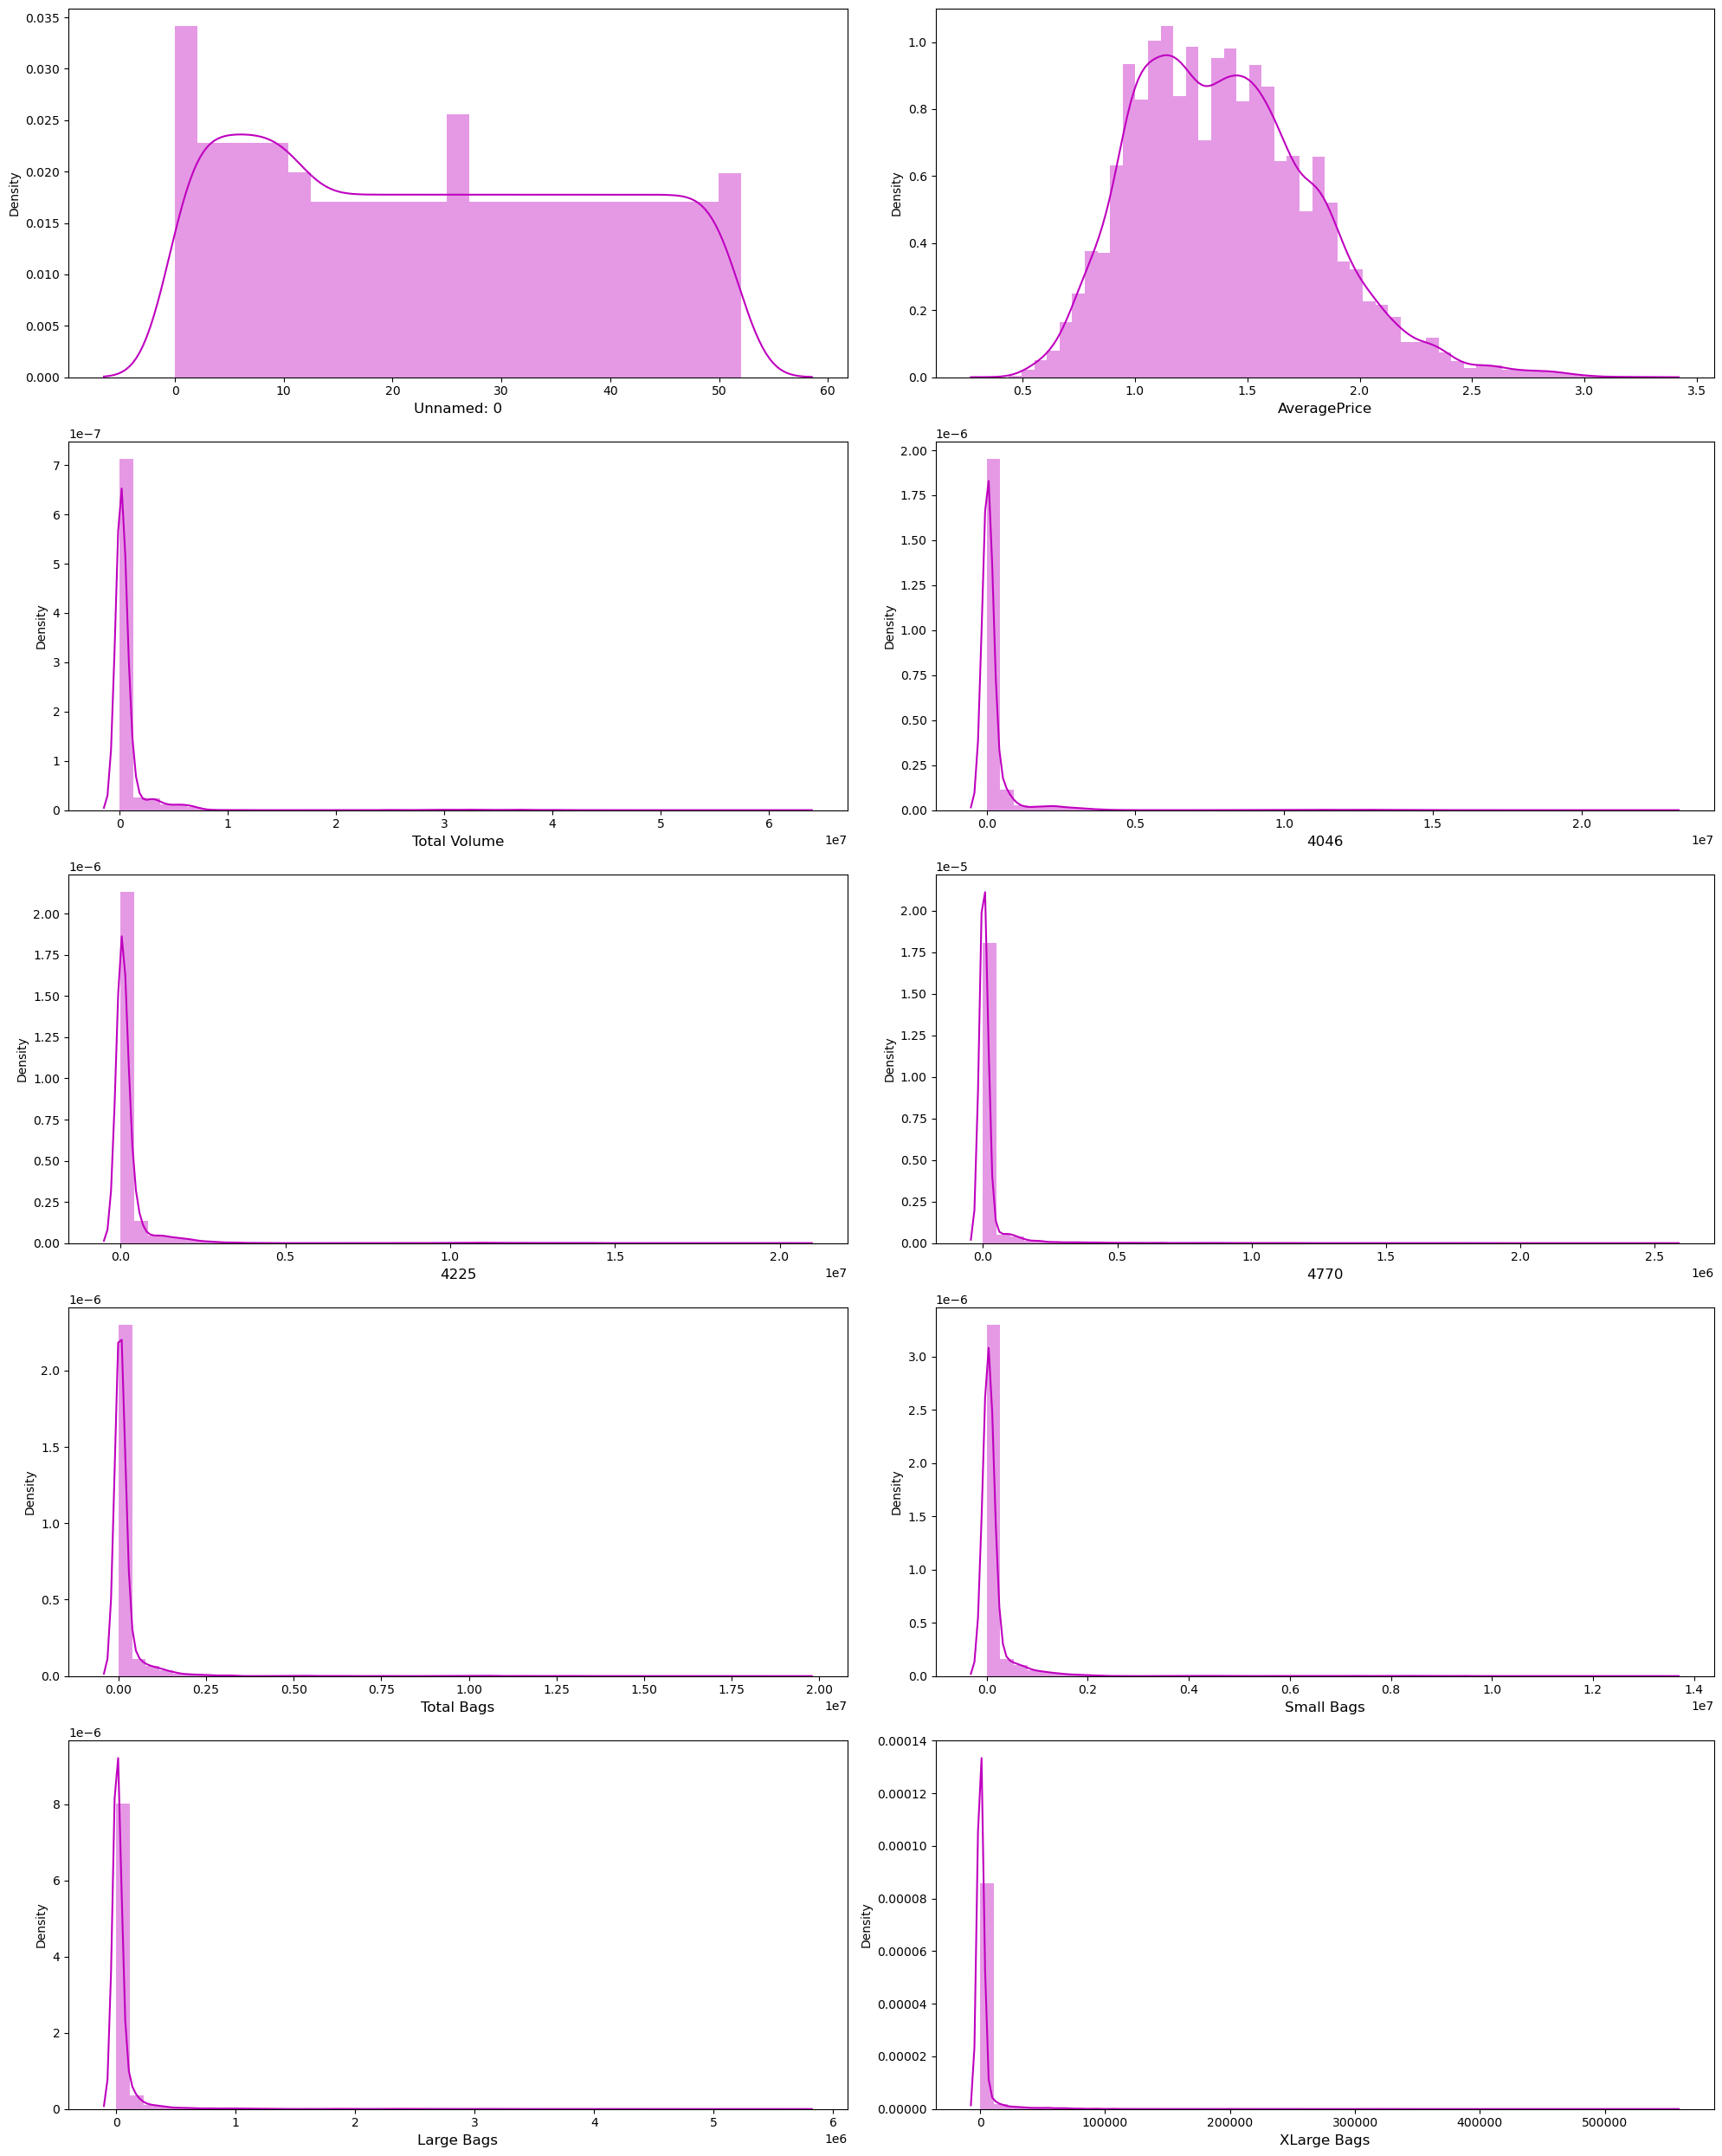

In [13]:
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
    p+=1
plt.tight_layout()

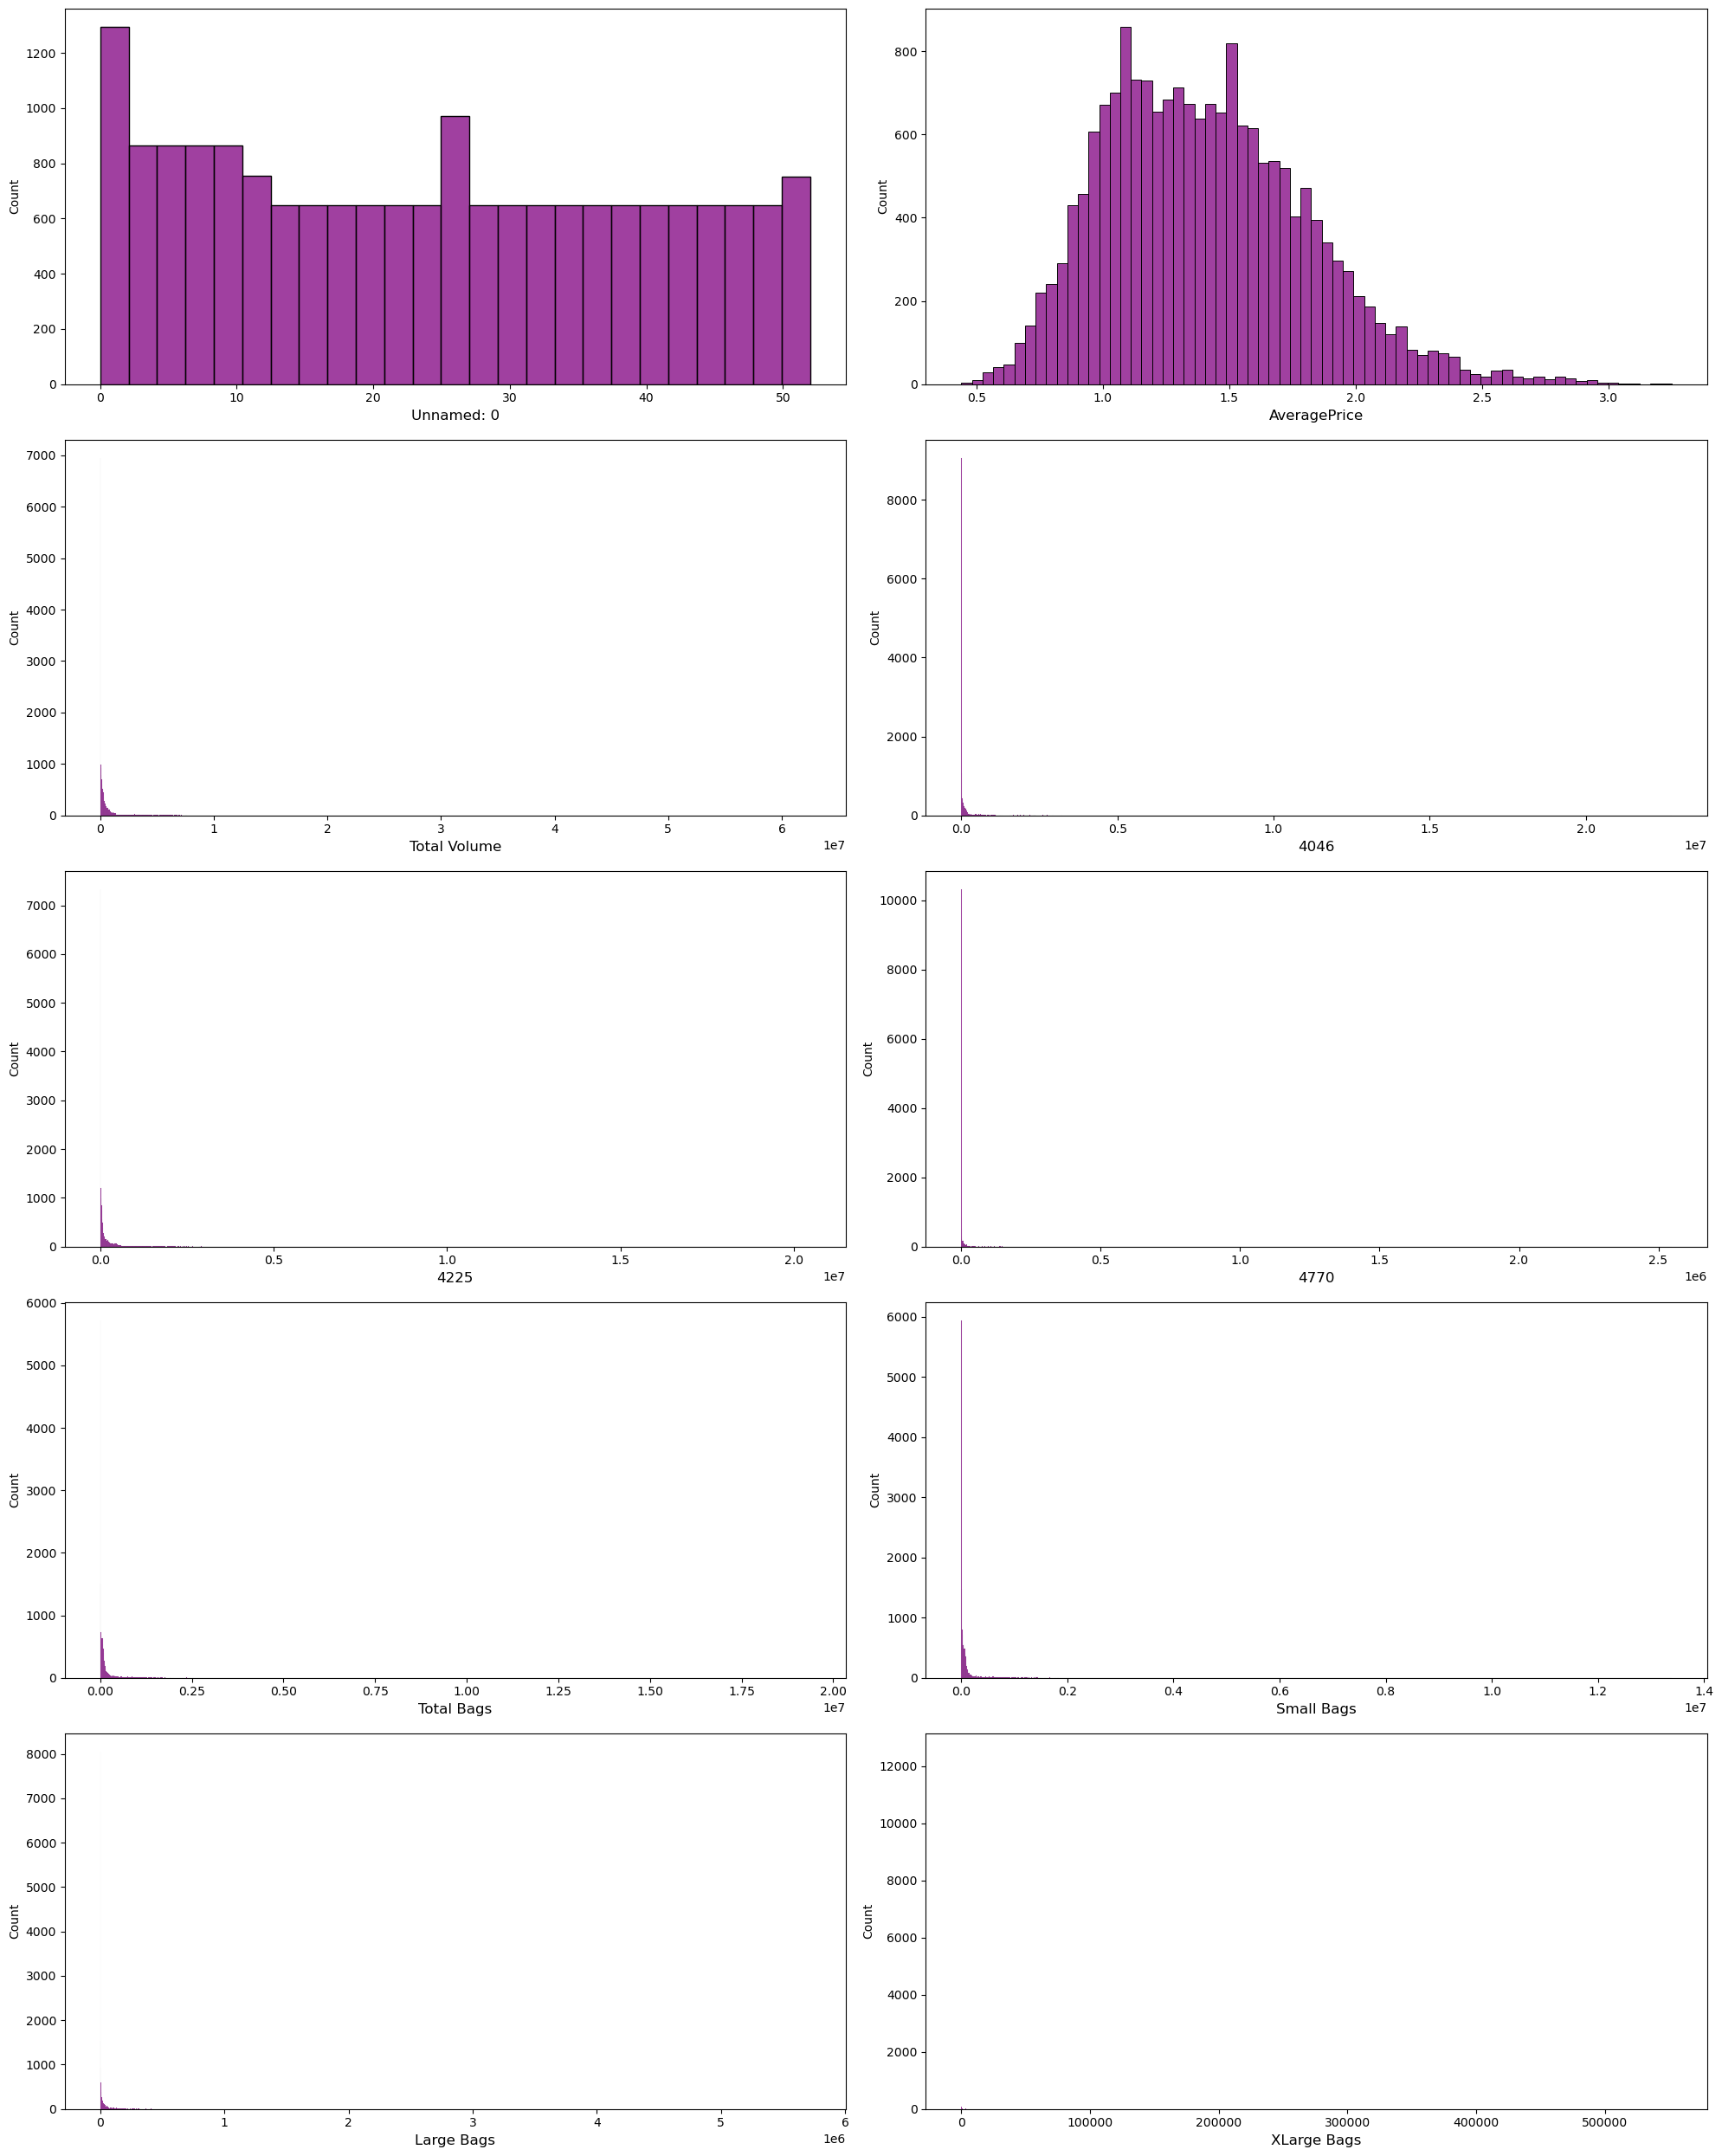

In [10]:
plt.figure (figsize=(20,25))
p=1
for i in num_col:
    if p<=10:
        plt.subplot(5,2,p)
        sns.histplot(df[i],color='purple')
        plt.xlabel(i,fontsize=12)
    p+=1
plt.tight_layout()

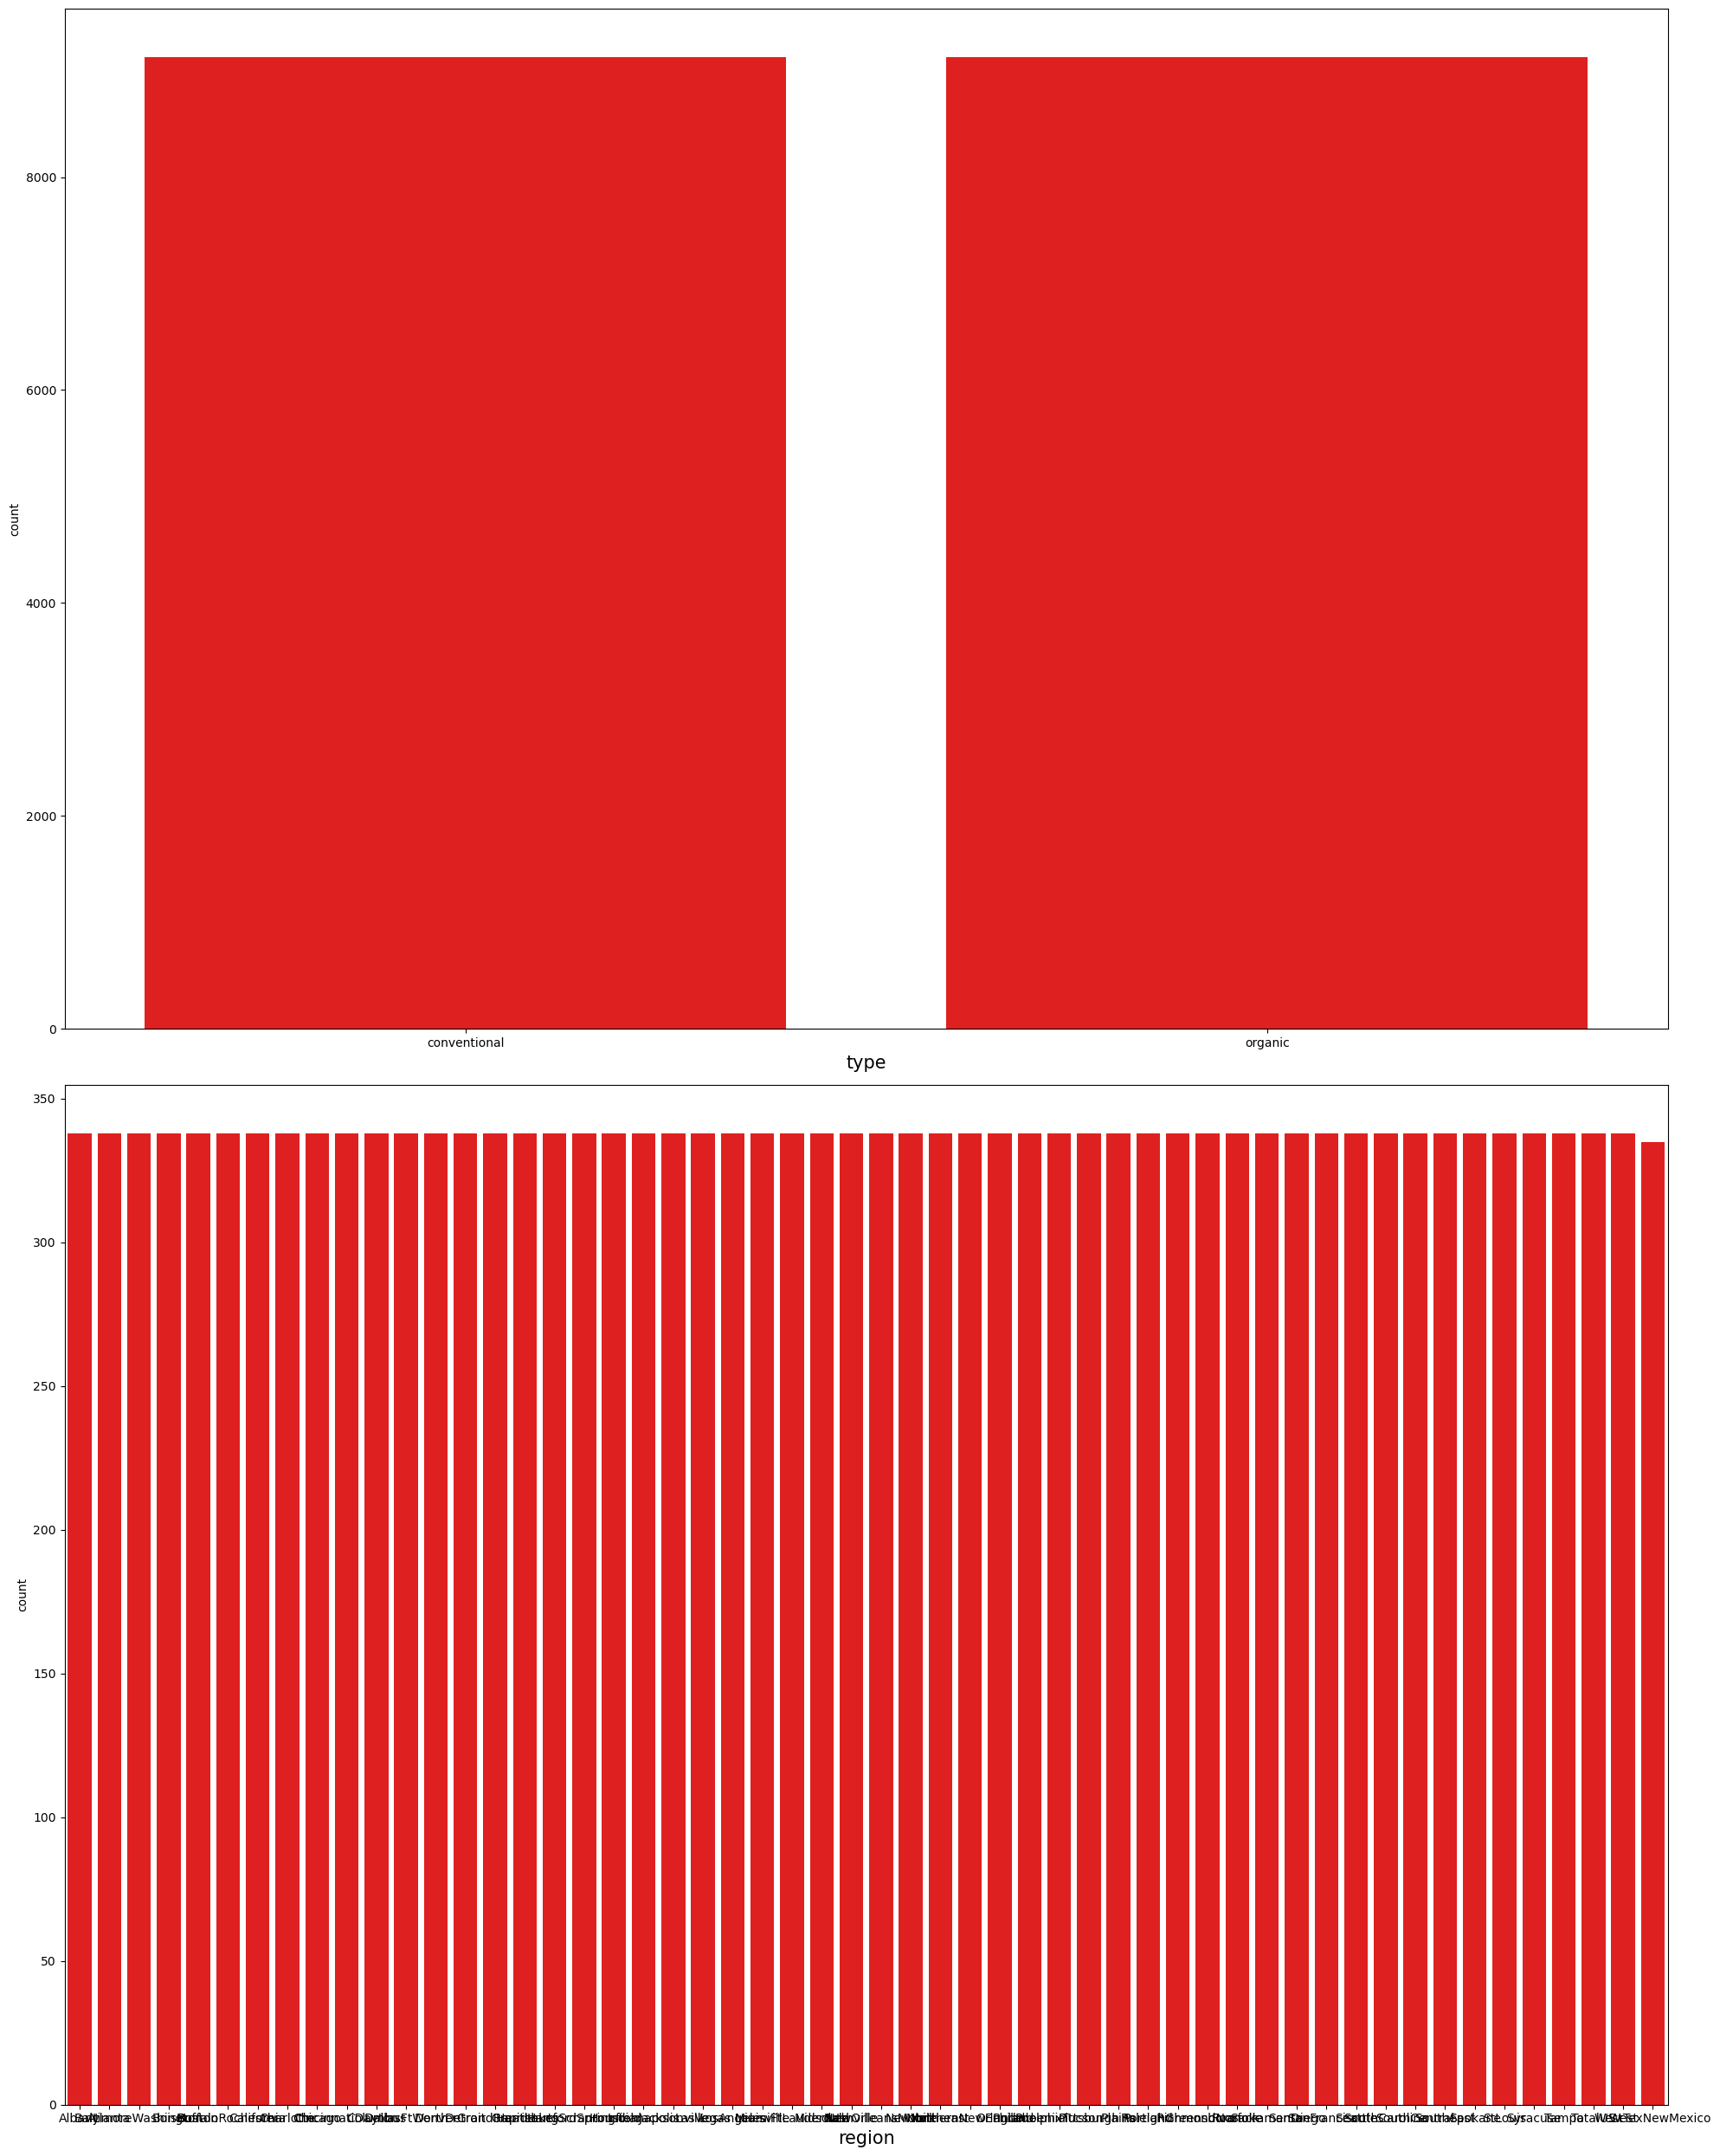

In [11]:
plt.figure(figsize=(20,25))
p=1
for i in cat_col:
    if p<=2:
        plt.subplot(2,1,p)
        sns.countplot(df[i],color='red')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

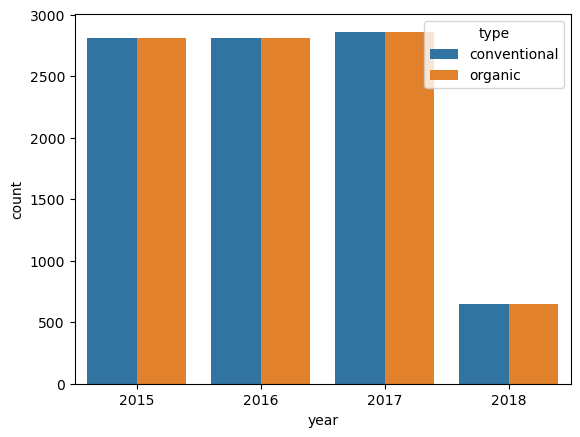

In [11]:
sns.countplot(hue=df.type,x=df.year)
plt.show()

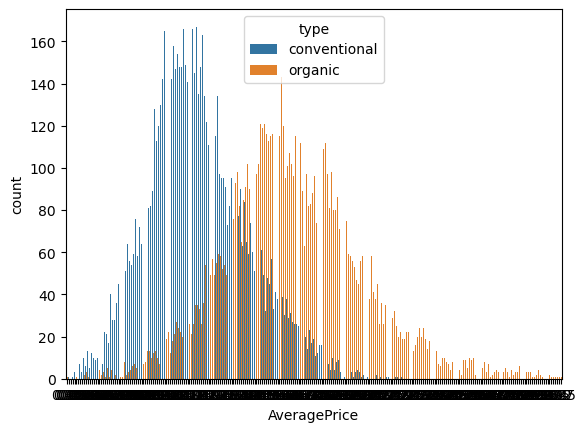

In [17]:
sns.countplot(hue=df.type,x=df.AveragePrice)
plt.show()

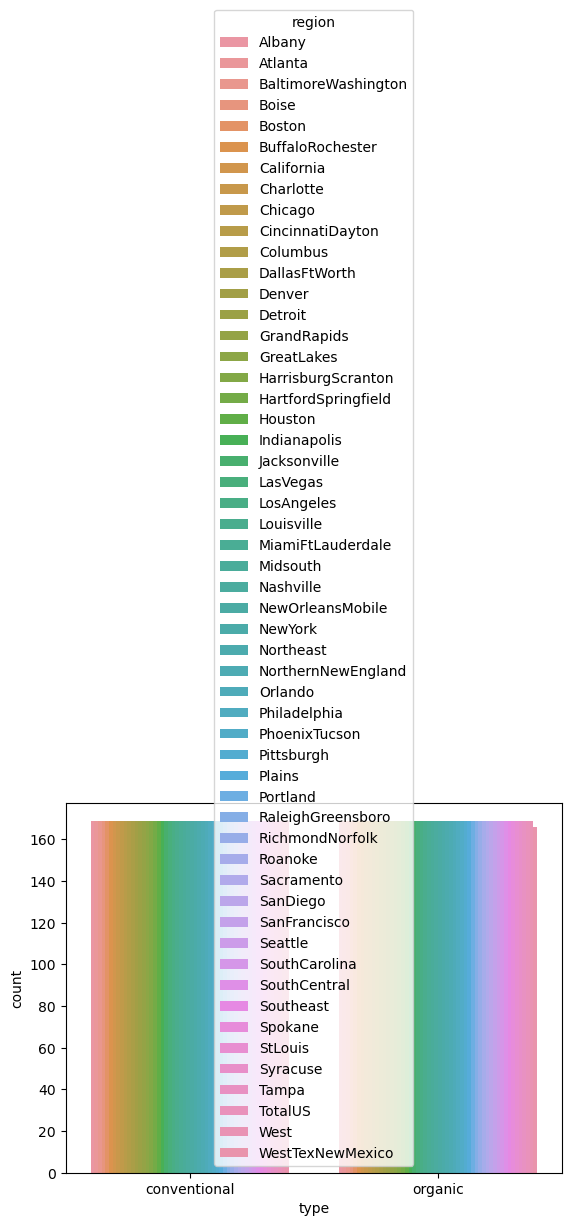

In [23]:
sns.countplot(hue=df.region,x=df.type)
plt.show()

<AxesSubplot:xlabel='4046'>

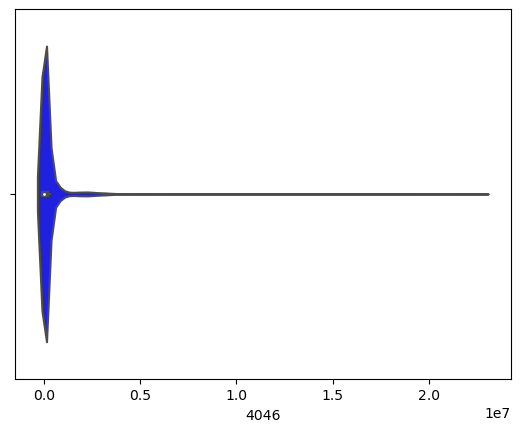

In [16]:
sns.violinplot(data=df,x='4046',hue='type',color='blue')

<AxesSubplot:xlabel='Small Bags', ylabel='Large Bags'>

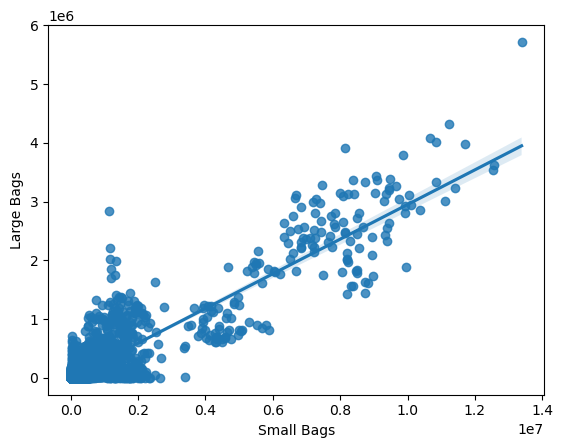

In [17]:
sns.regplot(data=df,x='Small Bags',y='Large Bags')

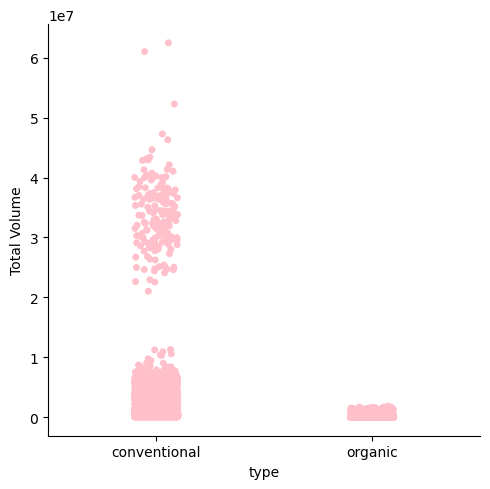

In [18]:
sns.catplot(data=df,x='type',y='Total Volume',color='pink')

<AxesSubplot:xlabel='type', ylabel='year'>

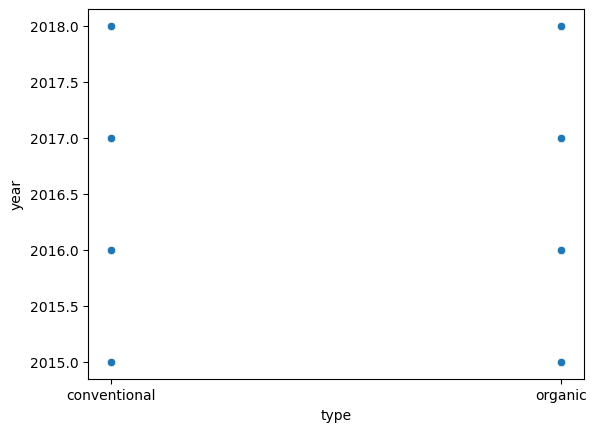

In [19]:
sns.scatterplot(data=df,x='type',y='year',palette='Setr_2')

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

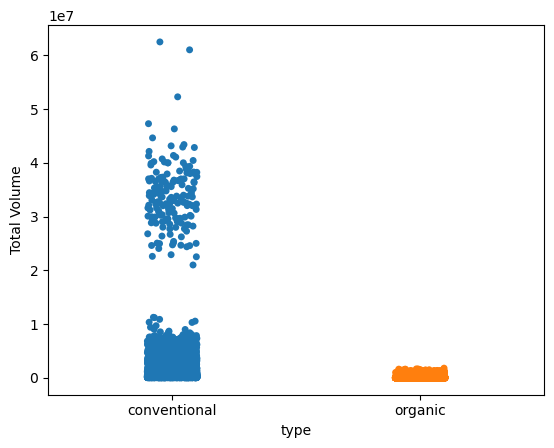

In [20]:
sns.stripplot(data=df,x='type',y='Total Volume')

<AxesSubplot:xlabel='4225', ylabel='4770'>

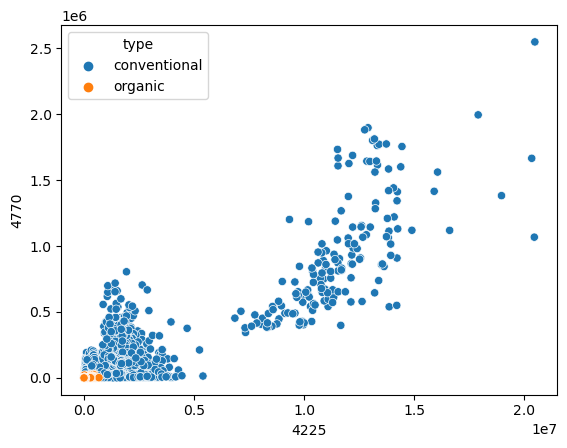

In [21]:
sns.scatterplot(data=df,x='4225',y='4770',hue='type')

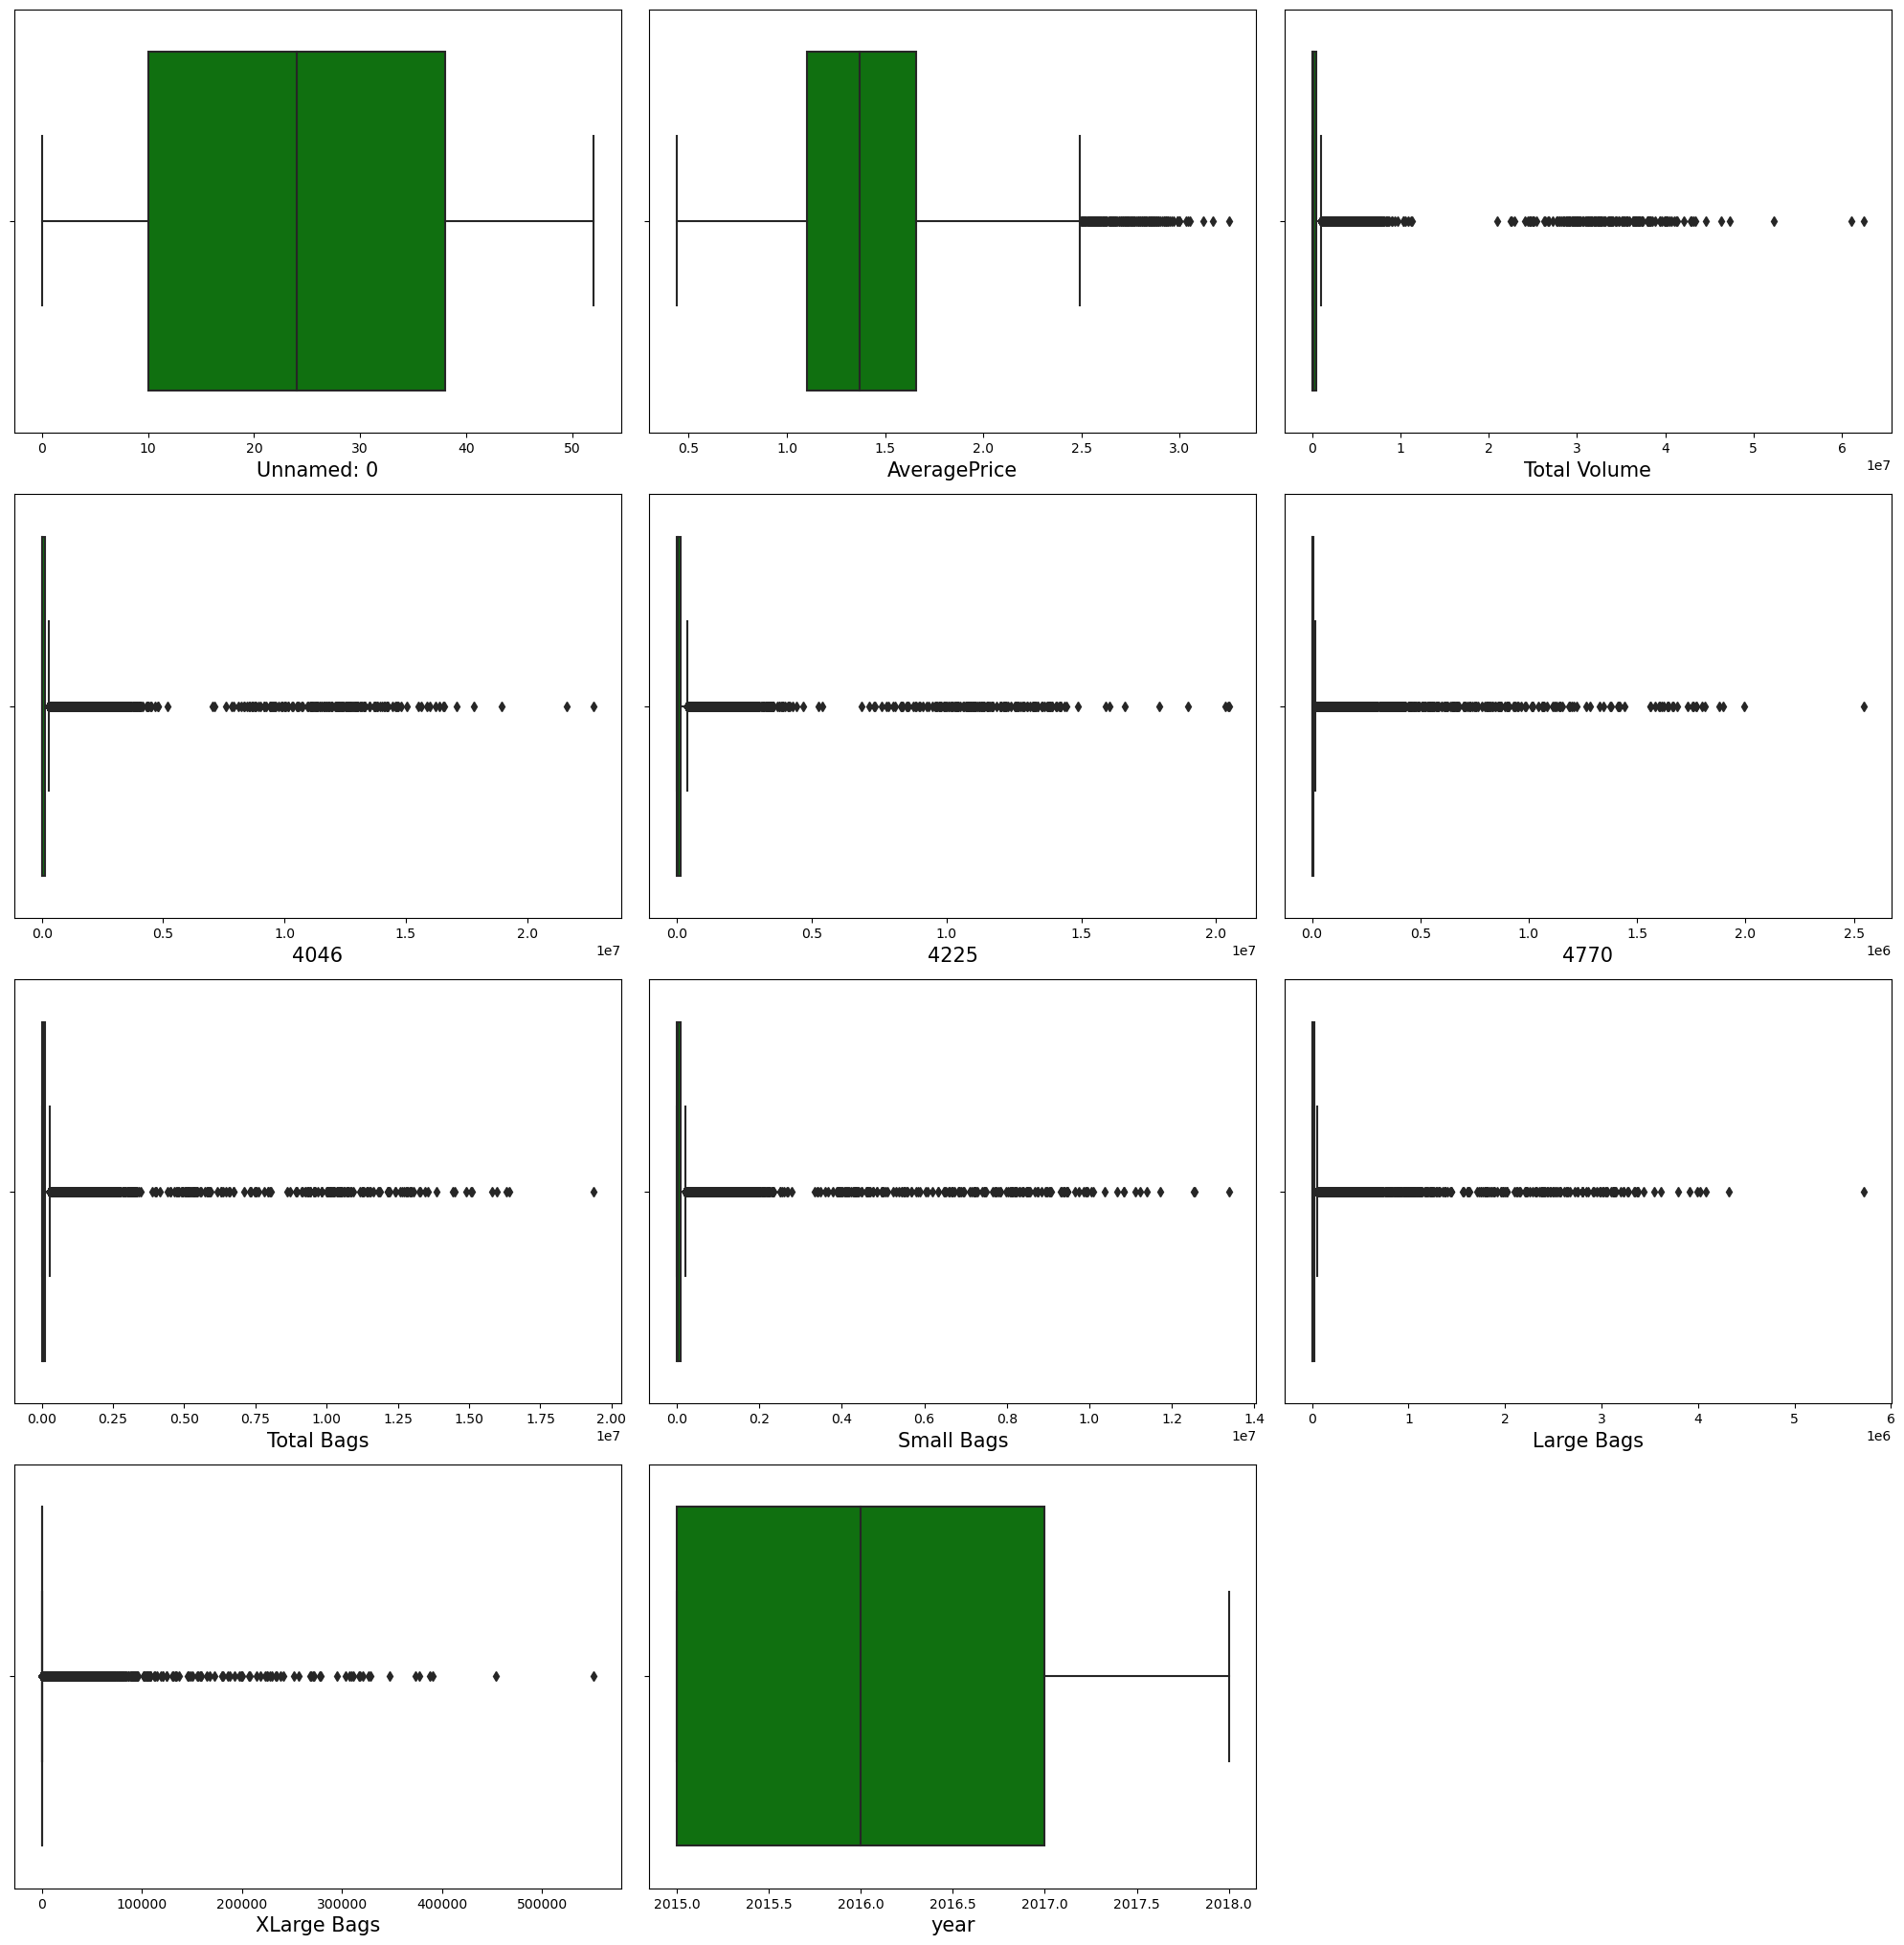

In [18]:
#Outliers Detection
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=15:
        plt.subplot(5,3,p)
        sns.boxplot(df[i],color='green')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

Here we can see there are very high amount of outliers present in the dataset, so if we will remove these outliers many data will be removed. So lets proceed without removing the outliers.

# Skewness

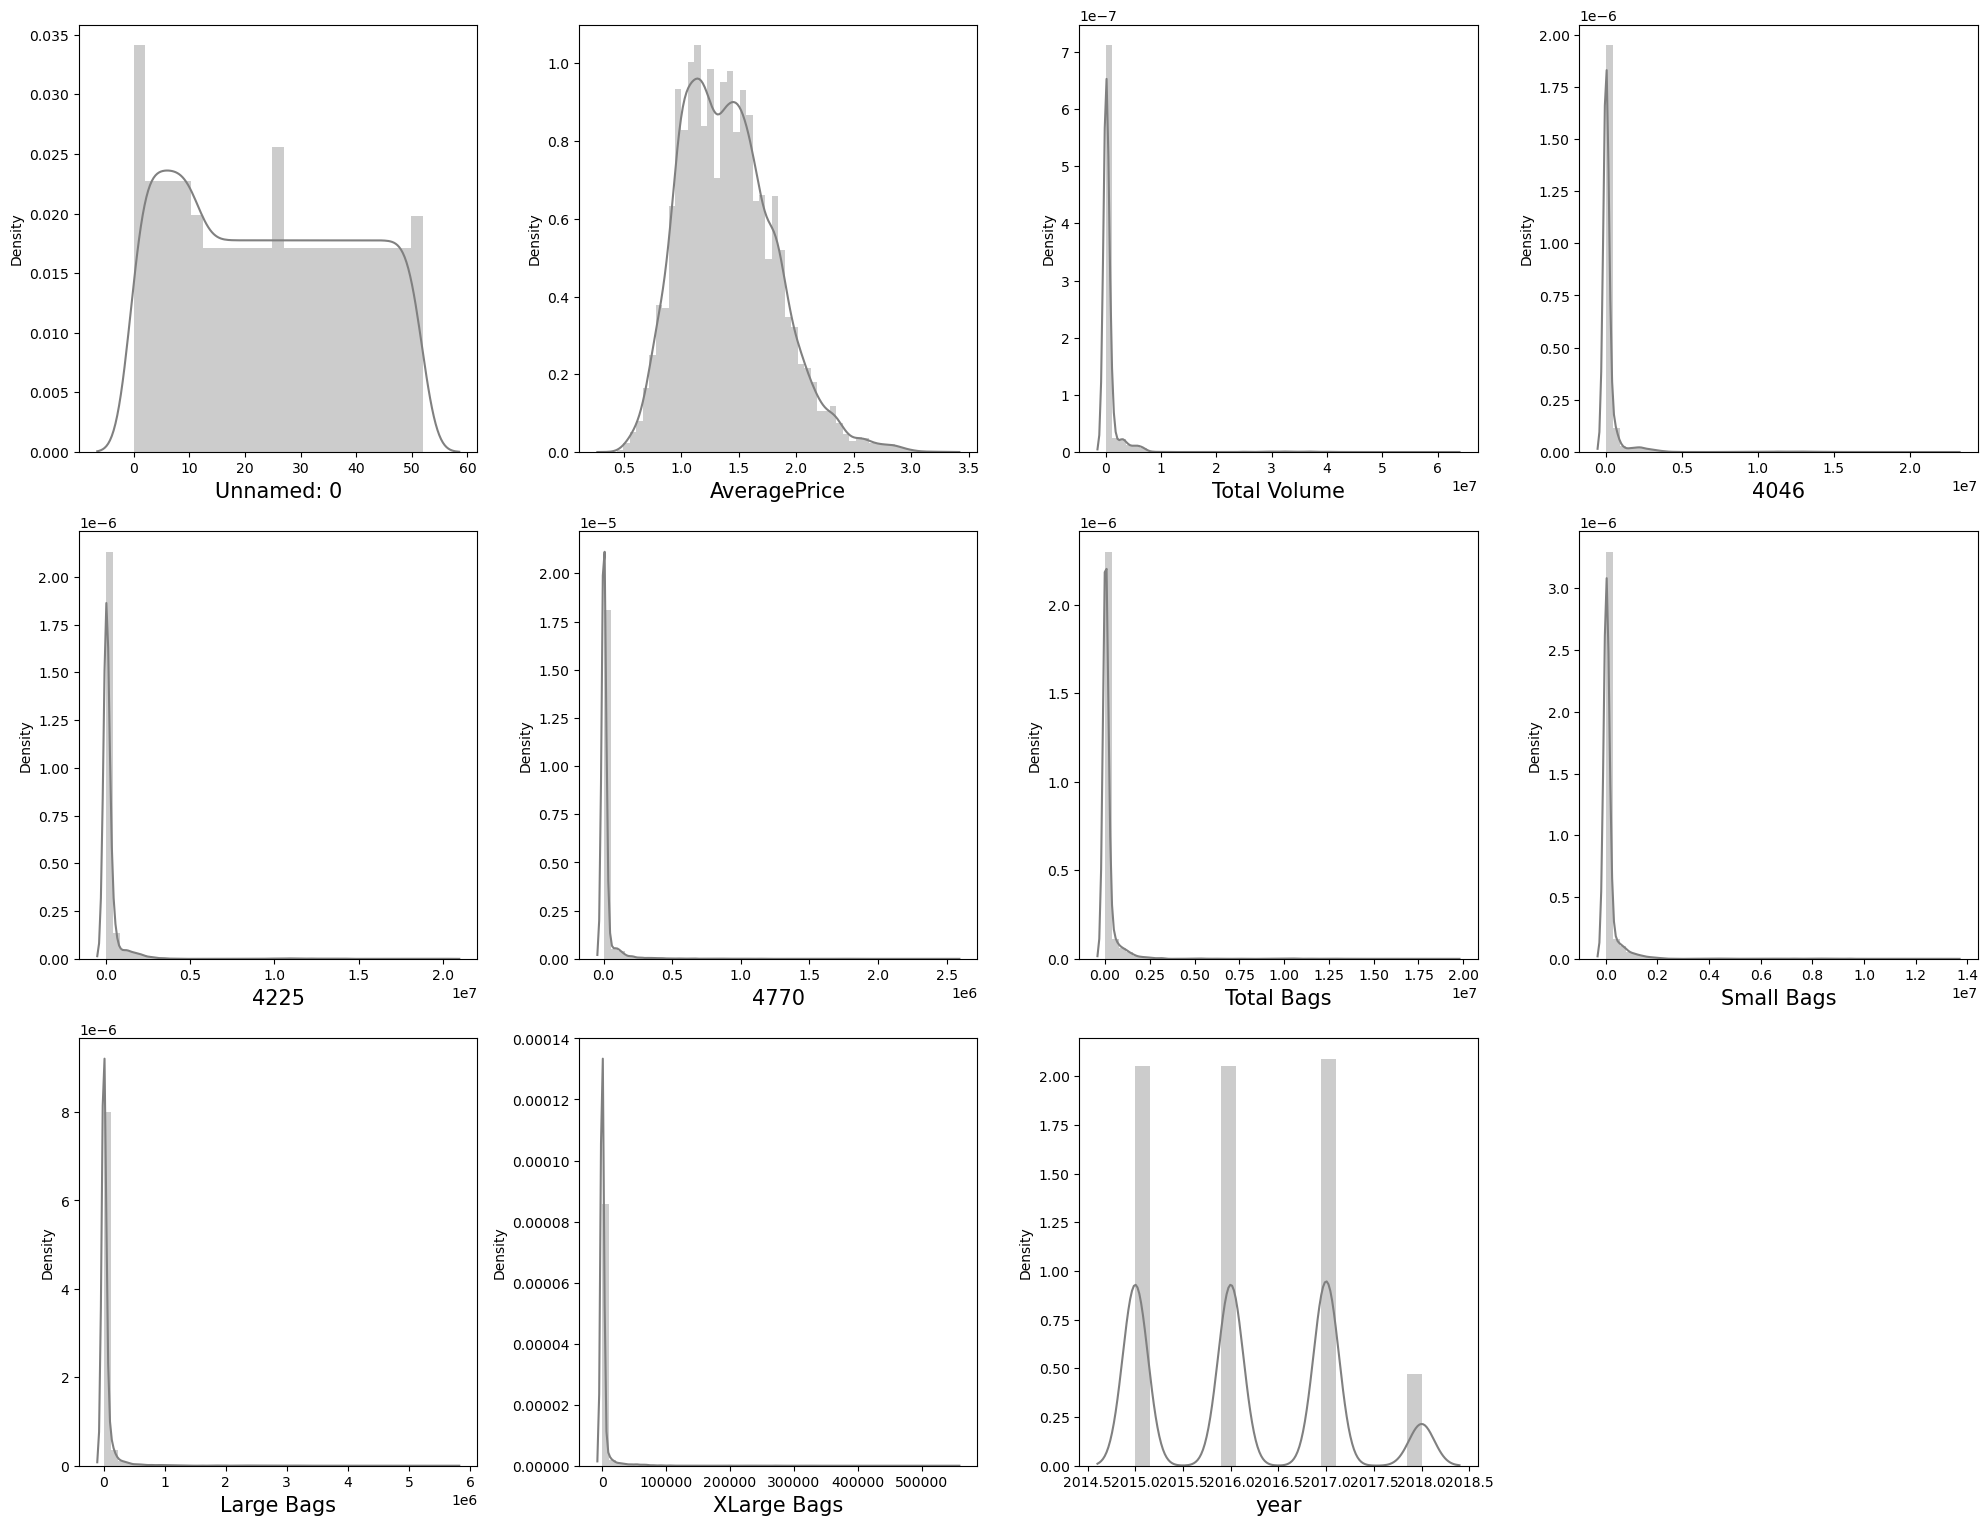

In [21]:
#Visualizing skewness
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=20:
        plt.subplot(5,4,p)
        sns.distplot(df[i],color='gray')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

Here also we can see there are almost many columns having skewness and if we remove them they will result in NaN values, so lets keep them as it is and procedd further

In [22]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


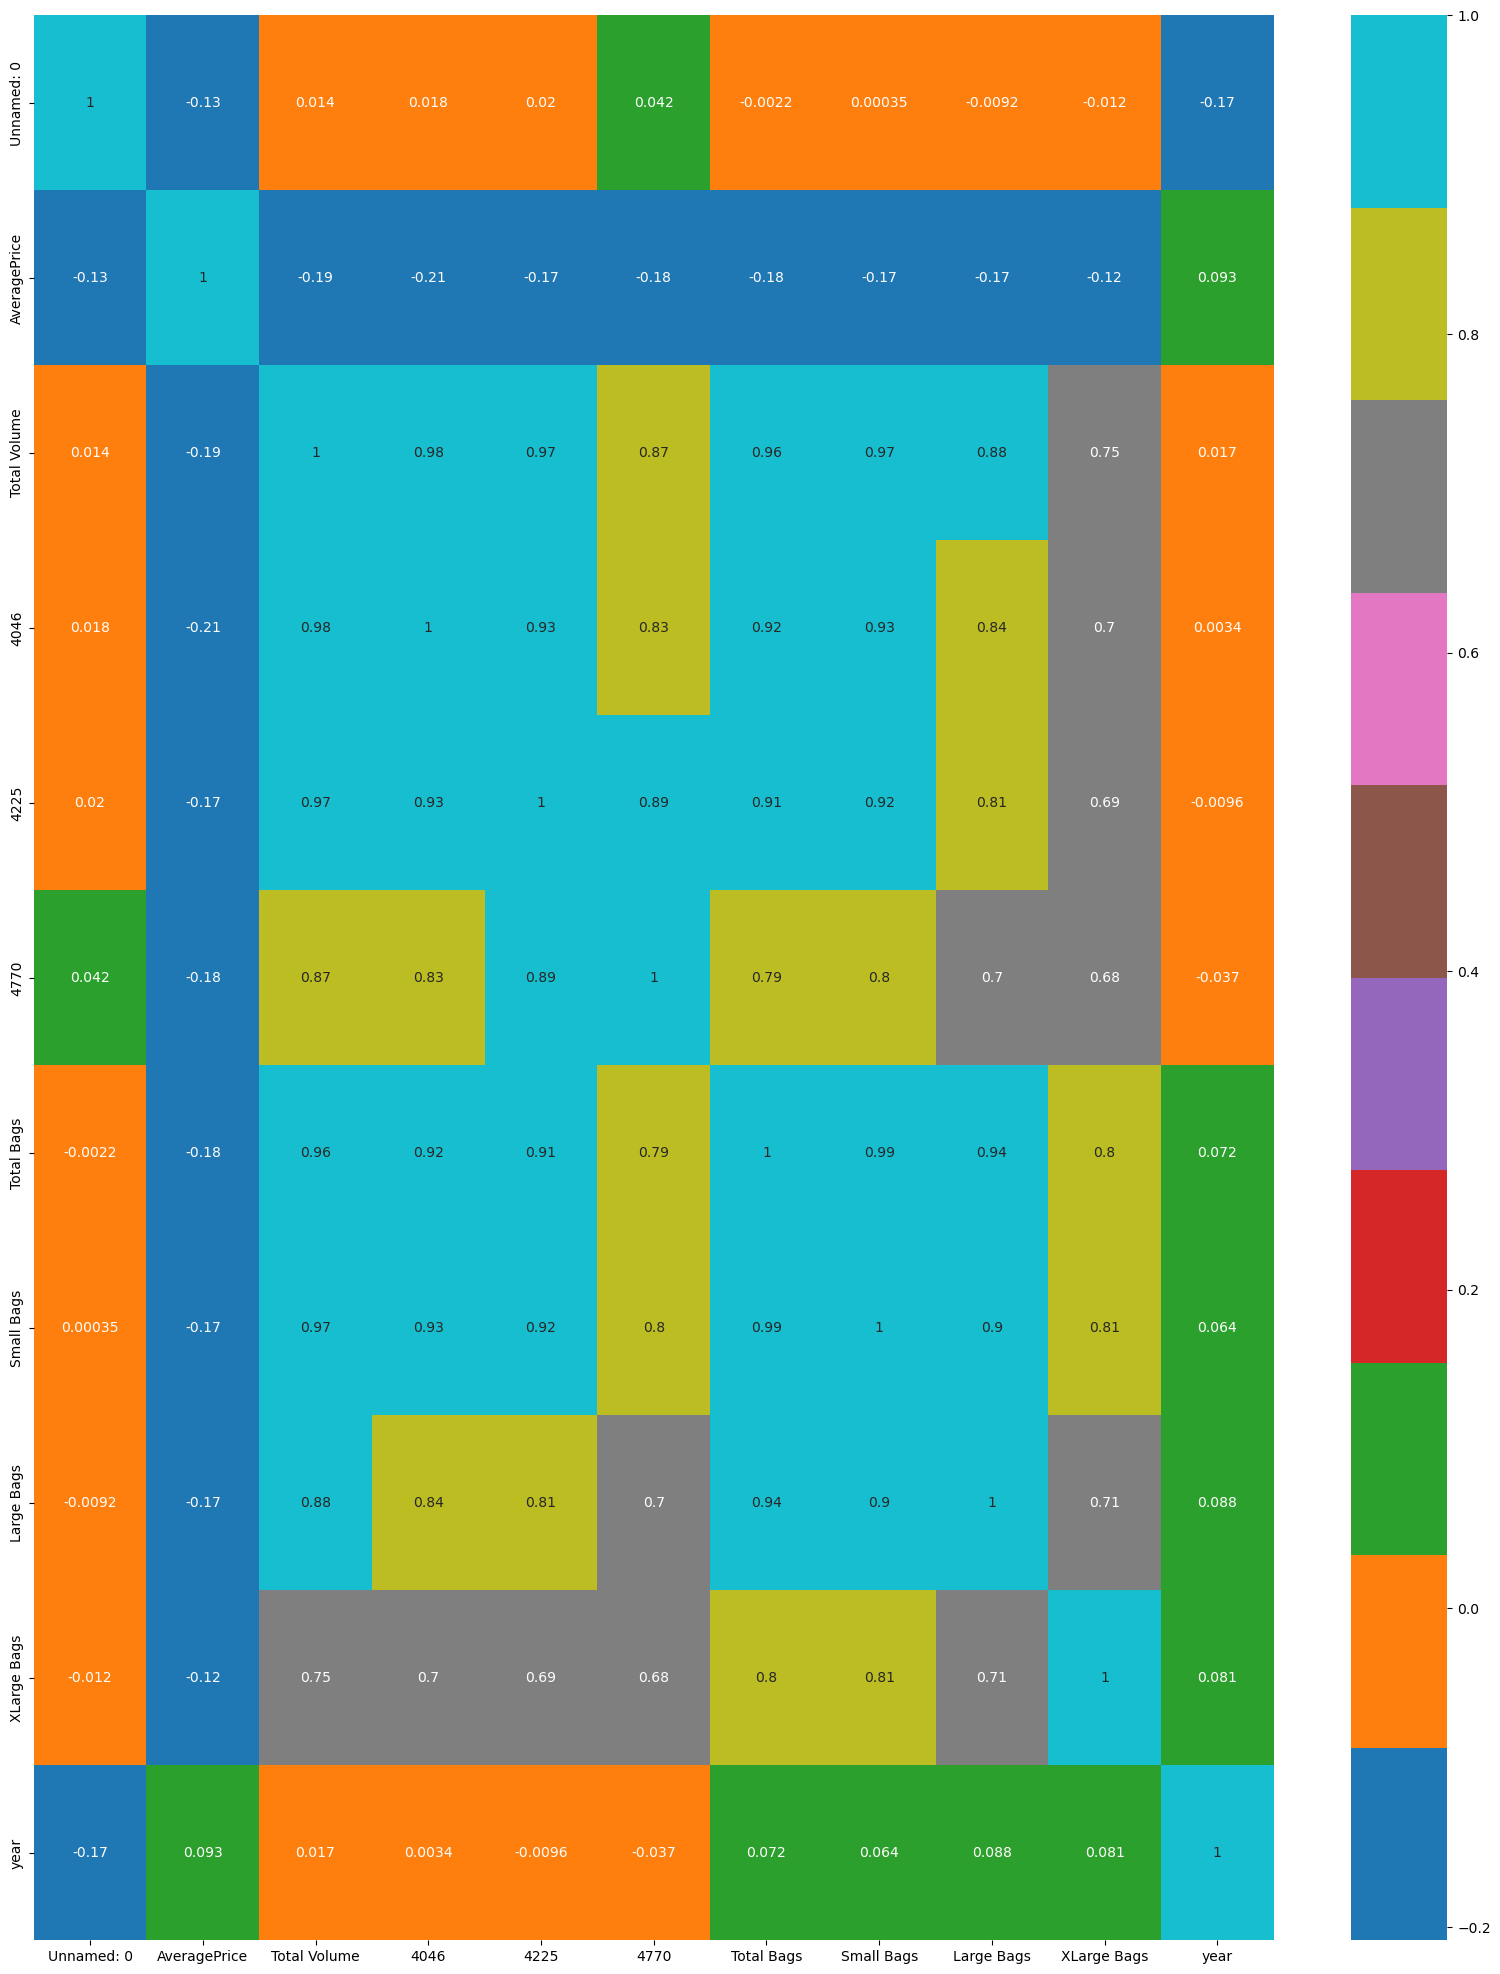

In [24]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True,cmap='tab10')
plt.show()

# Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
#Encoding the catergorical column
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [35]:
#Separating target and feature columns
df.columns
x=df.drop(['AveragePrice','region'],axis=1)
x.head()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
Date,,,,,,,,,,,
2015-12-27,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
2015-12-20,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2015-12-13,2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
2015-12-06,3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
2015-11-29,4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


In [36]:
y1=df[['AveragePrice']]
y1.head()

,AveragePrice
Date,
2015-12-27,1.33
2015-12-20,1.35
2015-12-13,0.93
2015-12-06,1.08
2015-11-29,1.28


In [37]:
y2=df[['region']]
y2.head()

,region
Date,
2015-12-27,0
2015-12-20,0
2015-12-13,0
2015-12-06,0
2015-11-29,0


# Scaling the numerical data

In [38]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
xf=st.fit_transform(st.fit_transform(x))
xf

array([[-1.5653269 , -0.22771641, -0.23081597, ..., -0.17557961,
        -0.99983562, -1.22128204],
       [-1.50073001, -0.23042664, -0.23110251, ..., -0.17557961,
        -0.99983562, -1.22128204],
       [-1.43613312, -0.21208462, -0.23100731, ..., -0.17557961,
        -0.99983562, -1.22128204],
       ...,
       [-0.98395486, -0.24233073, -0.2306933 , ..., -0.17557961,
         1.00016441,  1.97050371],
       [-0.91935797, -0.24162464, -0.2304279 , ..., -0.17557961,
         1.00016441,  1.97050371],
       [-0.85476108, -0.24125273, -0.22934712, ..., -0.17557961,
         1.00016441,  1.97050371]])

In [39]:
#creating dataframe of scaled features
x=pd.DataFrame(data=xf,columns=x.columns)
x.head()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-1.565327,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282
1,-1.500730,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282
2,-1.436133,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282
3,-1.371536,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282
4,-1.306939,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282


Now all our datas are scaled.

# Multi-Collinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif=pd.DataFrame()
vif['VIF_Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF_Values,Features
0,1.034138e+00,Unnamed: 0
1,4.927225e+09,Total Volume
2,6.610623e+08,4046
3,5.989766e+08,4225
4,4.770996e+06,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.621465e+10,XLarge Bags
9,1.060217e+00,type


As we can see there is not much collinearity present. So lets proceed for modelling.

In [42]:
#Checking if the dataset is balance or not
from imblearn.over_sampling import SMOTE

In [44]:
y2.value_counts()

region
0         338
40        338
29        338
30        338
31        338
32        338
33        338
34        338
35        338
36        338
37        338
38        338
39        338
41        338
1         338
42        338
43        338
44        338
45        338
46        338
47        338
48        338
49        338
50        338
51        338
52        338
28        338
27        338
26        338
25        338
2         338
3         338
4         338
5         338
6         338
7         338
8         338
9         338
10        338
11        338
12        338
13        338
14        338
15        338
16        338
17        338
18        338
19        338
20        338
21        338
22        338
23        338
24        338
53        335
dtype: int64

As we can see its almost a balanced dataset, so need of resampling the data.

# Modelling

# Regression Model Building

In [48]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
#finding the best random state
max_acc=0
max_RS=0
for i in range(0,200):
    x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.33,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y1_train)
    pred=dtr.predict(x_test)
    score=r2_score(y1_test,pred)
    if score>max_acc:
        max_acc=score
        max_RS=i
print("The maximum score at random_state",max_RS,"is",max_acc,".")

The maximum score at random_state 28 is 0.7534005606755597 .


In [53]:
#Creating train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.33,random_state=max_RS)
print(x_train.shape)
print(x_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(12226, 11)
(6023, 11)
(12226, 1)
(6023, 1)


In [54]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()
lr.fit(x_train,y1_train)
lr_pred=lr.predict(x_test)
print("R2 score=",r2_score(y1_test,lr_pred))
print("MAE =",mean_absolute_error(y1_test,lr_pred))
print("MSE =",mean_squared_error(y1_test,lr_pred))

R2 score= 0.4297990236392599
MAE = 0.23498366756603734
MSE = 0.09397693868637609


In [57]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y1_train)
rfr_pred=rfr.predict(x_test)
print("R2 score=",r2_score(y1_test,rfr_pred))
print("MAE =",mean_absolute_error(y1_test,rfr_pred))
print("MSE =",mean_squared_error(y1_test,rfr_pred))

R2 score= 0.8774854769500186
MAE = 0.09822400796945044
MSE = 0.020192073142952013


In [58]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y1_train)
dtr_pred=dtr.predict(x_test)
print("R2 score=",r2_score(y1_test,dtr_pred))
print("MAE =",mean_absolute_error(y1_test,dtr_pred))
print("MSE =",mean_squared_error(y1_test,dtr_pred))

R2 score= 0.7544417897833258
MAE = 0.13050971276772372
MSE = 0.04047135978748132


In [59]:
sv=SVR()
sv.fit(x_train,y1_train)
sv_pred=sv.predict(x_test)
print("R2 score=",r2_score(y1_test,sv_pred))
print("MAE =",mean_absolute_error(y1_test,sv_pred))
print("MSE =",mean_squared_error(y1_test,sv_pred))

R2 score= 0.5882422459170623
MAE = 0.18967158033577752
MSE = 0.06786332330762468


In [61]:
knr=KNeighborsRegressor()
knr.fit(x_train,y1_train)
knr_pred=knr.predict(x_test)
print("R2 score=",r2_score(y1_test,knr_pred))
print("MAE =",mean_absolute_error(y1_test,knr_pred))
print("MSE =",mean_squared_error(y1_test,knr_pred))

R2 score= 0.6901158200380915
MAE = 0.16099452100282252
MSE = 0.05107316154740163


# Cross_Validation

In [63]:
from sklearn.model_selection import cross_val_score

In [67]:
rfr_score=cross_val_score(rfr,x,y1)
print(rfr_score)
print(rfr_score.mean())
print("The difference between cv score and r2 score is=",(r2_score(y1_test,rfr_pred)-rfr_score.mean()))

[-0.23037924  0.48930969  0.60544649  0.24953144 -0.05835604]
0.21111046590192867
The difference between cv score and r2 score is= 0.6663750110480899


In [69]:
dtr_score=cross_val_score(dtr,x,y1)
print(dtr_score)
print(dtr_score.mean())
print("The difference between cv score and r2 score is=",(r2_score(y1_test,dtr_pred)-dtr_score.mean()))

[-0.79605001  0.04197732  0.14002828 -0.15247159 -0.5910874 ]
-0.2715206818975669
The difference between cv score and r2 score is= 1.0259624716808926


Here we can see from the obtained values rfr is having the least value, so lets proceed with this model.

# Hyper_Paramter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=rfr
parameters={'n_estimators':[100,120,150,160],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y1)
print("GRID",grid)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

In [77]:
#Applying hyper_paramter tuning
rfr=RandomForestRegressor(n_estimators=130,criterion='friedman_mse')
rfr.fit(x_train,y1_train)
pred=rfr.predict(x_test)
print("R2 SCORE =",r2_score(y1_test,pred))

R2 SCORE = 0.877537752347283


So our final model is RandomForestRegressor as after hyper parameter tuning it is giving the highest accuracy score.

In [78]:
final_model=rfr
final_model

RandomForestRegressor(criterion='friedman_mse', n_estimators=130)

# saving the best model and predicting the saved model

In [79]:
import joblib
joblib.dump(final_model,"Average Price.pkl")

['Average Price.pkl']

In [80]:
model=joblib.load("Average Price.pkl")
predict=model.predict(x_test)
predict

array([1.23238462, 1.60776923, 1.07923077, ..., 0.83569231, 1.63769231,
       1.20530769])

In [82]:
a=np.array(y1_test)
actual=a.flatten()
actual

array([1.14, 1.6 , 1.11, ..., 0.83, 1.78, 1.16])

In [83]:
ds=pd.DataFrame({"Actual_Value":actual,"Predicted_Value":predict})
ds

,Actual_Value,Predicted_Value
0,1.14,1.232385
1,1.60,1.607769
2,1.11,1.079231
3,0.84,0.963077
4,1.06,1.079692
...,...,...
6018,2.24,1.628385
6019,1.02,1.069231
6020,0.83,0.835692
6021,1.78,1.637692


As we can see the model is performing well.

# Classification model

In [87]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
#finding the best random_state
max_acc=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.25,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y2_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(y2_test,pred)
    if score>max_acc:
        max_acc=score
        max_rs=i
print("Max accuracy score is",max_acc,"at the random state",max_rs,".")        

Max accuracy score is 0.8040762656147271 at the random state 157 .


In [91]:
#creating train_test_split
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.25,random_state=max_rs)
print(x_train.shape)
print(x_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(13686, 11)
(4563, 11)
(13686, 1)
(4563, 1)


In [106]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y2_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y2_test,dtc_pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y2_test,dtc_pred),"\n")
print("Classification Report\n",classification_report(y2_test,dtc_pred))

Accuracy Score = 0.7983782599167214 

Confusion Matrix
 [[69  0  0 ...  0  0  0]
 [ 0 69  0 ...  0  0  0]
 [ 0  0 73 ...  0  0  1]
 ...
 [ 0  0  0 ... 91  0  0]
 [ 0  0  0 ...  0 75  0]
 [ 0  2  2 ...  0  0 55]] 

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        84
           1       0.78      0.80      0.79        86
           2       0.92      0.89      0.91        82
           3       0.74      0.76      0.75        82
           4       0.91      0.88      0.90        78
           5       0.80      0.80      0.80        96
           6       0.94      0.94      0.94        83
           7       0.83      0.83      0.83        83
           8       0.88      0.88      0.88        82
           9       0.80      0.87      0.83        90
          10       0.75      0.62      0.68        96
          11       0.81      0.84      0.83        88
          12       0.90      0.93      0.91        84
      

In [108]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y2_train)
rfc_pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y2_test,rfc_pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y2_test,rfc_pred),"\n")
print("Classification Report\n",classification_report(y2_test,rfc_pred))

Accuracy Score = 0.8991891299583608 

Confusion Matrix
 [[78  0  0 ...  0  0  0]
 [ 0 79  0 ...  0  0  0]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ... 91  0  0]
 [ 0  0  0 ...  0 84  0]
 [ 0  3  1 ...  0  0 66]] 

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        84
           1       0.84      0.92      0.88        86
           2       0.98      0.99      0.98        82
           3       0.92      0.79      0.85        82
           4       0.93      0.99      0.96        78
           5       0.96      0.82      0.89        96
           6       0.98      0.96      0.97        83
           7       0.93      0.93      0.93        83
           8       0.94      0.91      0.93        82
           9       0.92      0.92      0.92        90
          10       0.88      0.85      0.87        96
          11       0.89      0.92      0.91        88
          12       0.94      0.98      0.96        84
      

# Cross_Validation

In [111]:
rfc_score=cross_val_score(rfc,x,y2)
print(rfc_score)
print(rfc_score.mean())
print("The difference between accuracy and cv is",(accuracy_score(y2_test,rfc_pred)-rfc_score.mean()))

[0.62219178 0.79452055 0.74438356 0.66410959 0.47684297]
0.6604096900257905
The difference between accuracy and cv is 0.23877943993257023


In [113]:
dtc_score=cross_val_score(dtc,x,y2)
print(dtc_score)
print(dtc_score.mean())
print("The difference between accuracy and cv is",(accuracy_score(y2_test,dtc_pred)-dtc_score.mean()))

[0.48931507 0.67205479 0.60027397 0.53589041 0.41161962]
0.5418307736779077
The difference between accuracy and cv is 0.25654748623881374


So we can see between the tested models, rfc is having least difference.

# Hyper_Parameter Tuning

In [ ]:
model=rfc
parameters={'n_estimators':[120,150,180,100,300],'criterion':['gini','entropy','log_loss']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y2)
print("GRID =",grid)
print("Score =",grid.best_score_)
print(grid.best_params_)

In [122]:
#Applying the hyper_parameter
rfc=RandomForestClassifier(n_estimators=180,criterion='gini')
rfc.fit(x_train,y2_train)
pred=rfc.predict(x_test)
print("Accurcay Score =",accuracy_score(y2_test,pred))

Accurcay Score = 0.9002849002849003


So our final model is RandomForestClassifier.

In [123]:
final_model=rfc
final_model

RandomForestClassifier(n_estimators=180)

# Saving and predicting best model

In [124]:
import joblib
joblib.dump(final_model,"Region.pkl")

['Region.pkl']

In [133]:
model=joblib.load("Region.pkl")
model.fit(x_train,y2_train)
predict=model.predict(x_test)
predict

array([41, 16, 17, ...,  7, 34, 19])

In [135]:
a=np.array(y2_test)
actual=a.flatten()
actual

array([33, 16, 17, ...,  7, 34, 19])

In [136]:
ds=pd.DataFrame({"Actual Value":actual,"Predicted_Value":predict})
ds

,Actual Value,Predicted_Value
0,33,41
1,16,16
2,17,17
3,10,10
4,38,38
...,...,...
4558,15,15
4559,30,30
4560,7,7
4561,34,34


We can see our models are performing very well.